# District: Alappuzha

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
flood_days = pd.read_csv('Kerala-data/warnings_actual_predicted.csv')

In [5]:
flood_days[:30]

,district,date,actual_rainfall,predicted_rainfall
0,Alappuzha,8/10/2018,Green,Yellow
1,Alappuzha,8/11/2018,Green,Red
2,Alappuzha,8/12/2018,Green,Red
3,Alappuzha,8/13/2018,Green,Orange
4,Alappuzha,8/14/2018,Green,Orange
5,Alappuzha,8/15/2018,Red,Orange
6,Alappuzha,8/16/2018,Red,Orange
7,Alappuzha,8/17/2018,Yellow,Orange
8,Alappuzha,8/18/2018,Green,Yellow
9,Alappuzha,8/19/2018,Green,Yellow


In [6]:
flood_days.shape

(210, 4)

In [3]:
flood_days.loc[(flood_days['district']=='Alappuzha') & (flood_days['actual_rainfall']=='Red'), :]

,district,date,actual_rainfall,predicted_rainfall
5,Alappuzha,8/15/2018,Red,Orange
6,Alappuzha,8/16/2018,Red,Orange


In [3]:
data_weather = pd.read_csv('Kerala-data/Alappuzha.csv')
data_weather

,time,temperature_2m_max (°C),temperature_2m_min (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h)
0,01-01-1940,NaN,NaN,1940-01-01T06:39,1940-01-01T18:16,NaN,NaN,NaN,1,NaN,NaN
1,02-01-1940,30.7,19.0,1940-01-02T06:39,1940-01-02T18:17,0.0,0.0,0.0,0,13.0,30.2
2,03-01-1940,30.8,20.5,1940-01-03T06:40,1940-01-03T18:17,0.0,0.0,0.0,0,13.0,30.6
3,04-01-1940,30.8,20.6,1940-01-04T06:40,1940-01-04T18:18,0.2,0.2,0.0,2,13.0,30.6
4,05-01-1940,30.5,19.7,1940-01-05T06:40,1940-01-05T18:18,0.0,0.0,0.0,0,11.9,27.0
...,...,...,...,...,...,...,...,...,...,...,...
30392,18-03-2023,31.4,24.6,2023-03-18T06:29,2023-03-18T18:36,8.5,8.5,0.0,11,9.2,29.5
30393,19-03-2023,29.9,24.2,2023-03-19T06:28,2023-03-19T18:36,8.4,8.4,0.0,17,10.3,25.9
30394,20-03-2023,30.9,24.5,2023-03-20T06:27,2023-03-20T18:36,4.7,4.7,0.0,17,14.8,36.4
30395,21-03-2023,32.6,25.3,2023-03-21T06:27,2023-03-21T18:36,0.0,0.0,0.0,0,15.5,35.6


In [4]:
data_weather.columns

Index(['time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)', 'precipitation_sum (mm)',
       'rain_sum (mm)', 'snowfall_sum (cm)', 'precipitation_hours (h)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)'],
      dtype='object')

In [5]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30397 entries, 0 to 30396
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      30397 non-null  object 
 1   temperature_2m_max (°C)   30396 non-null  float64
 2   temperature_2m_min (°C)   30396 non-null  float64
 3   sunrise (iso8601)         30397 non-null  object 
 4   sunset (iso8601)          30397 non-null  object 
 5   precipitation_sum (mm)    30396 non-null  float64
 6   rain_sum (mm)             30396 non-null  float64
 7   snowfall_sum (cm)         30396 non-null  float64
 8   precipitation_hours (h)   30397 non-null  int64  
 9   windspeed_10m_max (km/h)  30396 non-null  float64
 10  windgusts_10m_max (km/h)  30396 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [4]:
data_weather.drop(index=0, axis=0, inplace=True)

## Labelling as 1 for flood, 0 for not flood and -1 for unknown

In [5]:
data_weather['Label'] = -1

In [6]:
data_weather.loc[data_weather['time'] == '15-08-2018', 'Label'] = 1

In [7]:
data_weather.loc[data_weather['time'] == '16-08-2018', 'Label'] = 1

In [7]:
len(data_weather.loc[data_weather['precipitation_sum (mm)'] >= 100])

29

In [8]:
data_weather.loc[data_weather['time'] == '06-08-2013', 'Label'] = 1

In [9]:
data_weather['time_in_format'] = pd.to_datetime(data_weather['time'], dayfirst=True)

In [10]:
#Alapp_weather['time_format'][1]==pd.Timestamp('1940-01-02 00:00:00')

In [11]:
data_weather.loc[(data_weather['time_in_format'] >= pd.Timestamp('2018-08-08 00:00:00')) & 
                  (data_weather['time_in_format'] <= pd.Timestamp('2018-08-22 00:00:00')), 'Label'] = 1

In [12]:
#data_weather.loc[(data_weather['time_in_format'] >= pd.Timestamp('1961-06-01 00:00:00')) & 
#                  (Alapp_weather['time_format'] <= pd.Timestamp('1961-09-30 00:00:00')), 'time'] =  

In [13]:
#Alapp_weather.loc[(Alapp_weather['time_format'] >= pd.Timestamp('2005-06-01 00:00:00')) & 
#                  (Alapp_weather['time_format'] <= pd.Timestamp('2005-09-30 00:00:00'))]

In [13]:
data_weather.isna().sum()

time                        0
temperature_2m_max (°C)     0
temperature_2m_min (°C)     0
sunrise (iso8601)           0
sunset (iso8601)            0
precipitation_sum (mm)      0
rain_sum (mm)               0
snowfall_sum (cm)           0
precipitation_hours (h)     0
windspeed_10m_max (km/h)    0
windgusts_10m_max (km/h)    0
Label                       0
time_in_format              0
dtype: int64

## Creating features out of date

In [14]:
data_weather['time_temp'] = data_weather.time.str.split('-')

In [15]:
data_weather['Day'] = data_weather.time_temp.str[0]
data_weather['Month'] = data_weather.time_temp.str[1]
data_weather['Year'] = data_weather.time_temp.str[2]

data_weather['Day'] = data_weather.Day.astype('int')
data_weather['Month'] = data_weather.Month.astype('int')
data_weather['Year'] = data_weather.Year.astype('int')

data_weather.drop(['time_temp'], axis=1, inplace=True)

In [16]:
data_weather['sunrise (iso8601)']

1        1940-01-02T06:39
2        1940-01-03T06:40
3        1940-01-04T06:40
4        1940-01-05T06:40
5        1940-01-06T06:41
               ...       
30392    2023-03-18T06:29
30393    2023-03-19T06:28
30394    2023-03-20T06:27
30395    2023-03-21T06:27
30396    2023-03-22T06:26
Name: sunrise (iso8601), Length: 30396, dtype: object

In [17]:
data_weather['sunrise (iso8601) temp'] = data_weather['sunrise (iso8601)'].str.split('T')

In [18]:
data_weather['sunrise (iso8601) temp'] = data_weather['sunrise (iso8601) temp'].str[1]

In [19]:
data_weather['sunrise (iso8601) temp']

1        06:39
2        06:40
3        06:40
4        06:40
5        06:41
         ...  
30392    06:29
30393    06:28
30394    06:27
30395    06:27
30396    06:26
Name: sunrise (iso8601) temp, Length: 30396, dtype: object

In [19]:
data_weather['sunrise (iso8601) temp'] = data_weather['sunrise (iso8601) temp'].str.split(':')
data_weather['sunrise (iso8601) temp']

1        [06, 39]
2        [06, 40]
3        [06, 40]
4        [06, 40]
5        [06, 41]
           ...   
30392    [06, 29]
30393    [06, 28]
30394    [06, 27]
30395    [06, 27]
30396    [06, 26]
Name: sunrise (iso8601) temp, Length: 30396, dtype: object

In [20]:
data_weather['sunrise_hour'] = data_weather['sunrise (iso8601) temp'].str[0]
data_weather['sunrise_minutes'] = data_weather['sunrise (iso8601) temp'].str[1]

data_weather['sunrise_hour'] = data_weather['sunrise_hour'].astype('int')
data_weather['sunrise_minutes'] = data_weather['sunrise_minutes'].astype('int')

data_weather.drop(['sunrise (iso8601) temp'], axis=1, inplace=True)

In [21]:
data_weather['sunset (iso8601) temp'] = data_weather['sunset (iso8601)'].str.split('T')

In [22]:
data_weather['sunset (iso8601) temp'] = data_weather['sunset (iso8601) temp'].str[1]

In [23]:
data_weather['sunset (iso8601) temp'] = data_weather['sunset (iso8601) temp'].str.split(':')

In [24]:
data_weather['sunset_hour'] = data_weather['sunset (iso8601) temp'].str[0]
data_weather['sunset_minutes'] = data_weather['sunset (iso8601) temp'].str[1]

data_weather['sunset_hour'] = data_weather['sunset_hour'].astype('int')
data_weather['sunset_minutes'] = data_weather['sunset_minutes'].astype('int')

data_weather.drop(['sunset (iso8601) temp'], axis=1, inplace=True)

In [25]:
data_weather

,time,temperature_2m_max (°C),temperature_2m_min (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,time_in_format,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,02-01-1940,30.7,19.0,1940-01-02T06:39,1940-01-02T18:17,0.0,0.0,0.0,0,13.0,30.2,-1,1940-01-02,2,1,1940,6,39,18,17
2,03-01-1940,30.8,20.5,1940-01-03T06:40,1940-01-03T18:17,0.0,0.0,0.0,0,13.0,30.6,-1,1940-01-03,3,1,1940,6,40,18,17
3,04-01-1940,30.8,20.6,1940-01-04T06:40,1940-01-04T18:18,0.2,0.2,0.0,2,13.0,30.6,-1,1940-01-04,4,1,1940,6,40,18,18
4,05-01-1940,30.5,19.7,1940-01-05T06:40,1940-01-05T18:18,0.0,0.0,0.0,0,11.9,27.0,-1,1940-01-05,5,1,1940,6,40,18,18
5,06-01-1940,30.5,19.8,1940-01-06T06:41,1940-01-06T18:19,0.0,0.0,0.0,0,13.0,28.1,-1,1940-01-06,6,1,1940,6,41,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30392,18-03-2023,31.4,24.6,2023-03-18T06:29,2023-03-18T18:36,8.5,8.5,0.0,11,9.2,29.5,-1,2023-03-18,18,3,2023,6,29,18,36
30393,19-03-2023,29.9,24.2,2023-03-19T06:28,2023-03-19T18:36,8.4,8.4,0.0,17,10.3,25.9,-1,2023-03-19,19,3,2023,6,28,18,36
30394,20-03-2023,30.9,24.5,2023-03-20T06:27,2023-03-20T18:36,4.7,4.7,0.0,17,14.8,36.4,-1,2023-03-20,20,3,2023,6,27,18,36
30395,21-03-2023,32.6,25.3,2023-03-21T06:27,2023-03-21T18:36,0.0,0.0,0.0,0,15.5,35.6,-1,2023-03-21,21,3,2023,6,27,18,36


In [23]:
data_cluster = data_weather.copy()

In [29]:
data_cluster

,time,temperature_2m_max (°C),temperature_2m_min (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,time_in_format,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,02-01-1940,30.7,19.0,1940-01-02T06:39,1940-01-02T18:17,0.0,0.0,0.0,0,13.0,30.2,-1,1940-01-02,2,1,1940,6,39,18,17
2,03-01-1940,30.8,20.5,1940-01-03T06:40,1940-01-03T18:17,0.0,0.0,0.0,0,13.0,30.6,-1,1940-01-03,3,1,1940,6,40,18,17
3,04-01-1940,30.8,20.6,1940-01-04T06:40,1940-01-04T18:18,0.2,0.2,0.0,2,13.0,30.6,-1,1940-01-04,4,1,1940,6,40,18,18
4,05-01-1940,30.5,19.7,1940-01-05T06:40,1940-01-05T18:18,0.0,0.0,0.0,0,11.9,27.0,-1,1940-01-05,5,1,1940,6,40,18,18
5,06-01-1940,30.5,19.8,1940-01-06T06:41,1940-01-06T18:19,0.0,0.0,0.0,0,13.0,28.1,-1,1940-01-06,6,1,1940,6,41,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30392,18-03-2023,31.4,24.6,2023-03-18T06:29,2023-03-18T18:36,8.5,8.5,0.0,11,9.2,29.5,-1,2023-03-18,18,3,2023,6,29,18,36
30393,19-03-2023,29.9,24.2,2023-03-19T06:28,2023-03-19T18:36,8.4,8.4,0.0,17,10.3,25.9,-1,2023-03-19,19,3,2023,6,28,18,36
30394,20-03-2023,30.9,24.5,2023-03-20T06:27,2023-03-20T18:36,4.7,4.7,0.0,17,14.8,36.4,-1,2023-03-20,20,3,2023,6,27,18,36
30395,21-03-2023,32.6,25.3,2023-03-21T06:27,2023-03-21T18:36,0.0,0.0,0.0,0,15.5,35.6,-1,2023-03-21,21,3,2023,6,27,18,36


## Clustering

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
data_cluster.drop(['Label', 'time', 'time_in_format', 'sunrise (iso8601)', 'sunset (iso8601)'], axis=1, inplace=True)
data_cluster.head()

,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,30.7,19.0,0.0,0.0,0.0,0,13.0,30.2,2,1,1940,6,39,18,17
2,30.8,20.5,0.0,0.0,0.0,0,13.0,30.6,3,1,1940,6,40,18,17
3,30.8,20.6,0.2,0.2,0.0,2,13.0,30.6,4,1,1940,6,40,18,18
4,30.5,19.7,0.0,0.0,0.0,0,11.9,27.0,5,1,1940,6,40,18,18
5,30.5,19.8,0.0,0.0,0.0,0,13.0,28.1,6,1,1940,6,41,18,19


In [31]:
data = data_cluster.values
data

array([[30.7, 19. ,  0. , ..., 39. , 18. , 17. ],
       [30.8, 20.5,  0. , ..., 40. , 18. , 17. ],
       [30.8, 20.6,  0.2, ..., 40. , 18. , 18. ],
       ...,
       [30.9, 24.5,  4.7, ..., 27. , 18. , 36. ],
       [32.6, 25.3,  0. , ..., 27. , 18. , 36. ],
       [32.5, 25.4,  0. , ..., 26. , 18. , 36. ]])

In [28]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()
data_sc = sc.fit_transform(data)

In [66]:
data_sc

array([[ 0.70648234, -3.97343888, -0.69487152, ...,  1.46450993,
         0.        , -0.78854278],
       [ 0.7567978 , -2.76602738, -0.69487152, ...,  1.53892724,
         0.        , -0.78854278],
       [ 0.7567978 , -2.68553328, -0.67811596, ...,  1.53892724,
         0.        , -0.72339263],
       ...,
       [ 0.80711326,  0.45373663, -0.30111584, ...,  0.57150222,
         0.        ,  0.44931015],
       [ 1.66247614,  1.09768943, -0.69487152, ...,  0.57150222,
         0.        ,  0.44931015],
       [ 1.61216067,  1.17818353, -0.69487152, ...,  0.49708491,
         0.        ,  0.44931015]])

In [67]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_sc)
    print("Silhouette Coefficient: %0.3f"% silhouette_score(data_sc, kmeans.labels_, metric='euclidean'))

Silhouette Coefficient: 0.223
Silhouette Coefficient: 0.262
Silhouette Coefficient: 0.232
Silhouette Coefficient: 0.222
Silhouette Coefficient: 0.204


In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_sc)
silhouette_score(data_sc, kmeans.labels_, metric='euclidean')

0.2616982828993008

In [70]:
cluster_0 = data_sc[kmeans.labels_ == 0]
cluster_1 = data_sc[kmeans.labels_ == 1]
cluster_2 = data_sc[kmeans.labels_ == 2]

In [73]:
cluster_0.shape, cluster_1.shape, cluster_2.shape

((8195, 15), (10905, 15), (11296, 15))

## Semi-Supervised learning

In [29]:
data_weather.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,time_in_format,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,02-01-1940,30.7,19.0,1940-01-02T06:39,1940-01-02T18:17,0.0,0.0,0.0,0,13.0,30.2,-1,1940-01-02,2,1,1940,6,39,18,17
2,03-01-1940,30.8,20.5,1940-01-03T06:40,1940-01-03T18:17,0.0,0.0,0.0,0,13.0,30.6,-1,1940-01-03,3,1,1940,6,40,18,17
3,04-01-1940,30.8,20.6,1940-01-04T06:40,1940-01-04T18:18,0.2,0.2,0.0,2,13.0,30.6,-1,1940-01-04,4,1,1940,6,40,18,18
4,05-01-1940,30.5,19.7,1940-01-05T06:40,1940-01-05T18:18,0.0,0.0,0.0,0,11.9,27.0,-1,1940-01-05,5,1,1940,6,40,18,18
5,06-01-1940,30.5,19.8,1940-01-06T06:41,1940-01-06T18:19,0.0,0.0,0.0,0,13.0,28.1,-1,1940-01-06,6,1,1940,6,41,18,19


In [30]:
data_weather.loc[(data_weather.Month<6), 'Label'] = 0

In [31]:
data_weather.loc[data_weather.Month>10, 'Label'] = 0

In [27]:
data_weather.loc[data_weather.Month==10, 'Label']

274     -1
275     -1
276     -1
277     -1
278     -1
        ..
30250   -1
30251   -1
30252   -1
30253   -1
30254   -1
Name: Label, Length: 2573, dtype: int64

In [32]:
data_weather.Label.value_counts()

 0    17697
-1    12683
 1       16
Name: Label, dtype: int64

In [30]:
data_weather.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,time_in_format,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,02-01-1940,30.7,19.0,1940-01-02T06:39,1940-01-02T18:17,0.0,0.0,0.0,0,13.0,30.2,0,1940-01-02,2,1,1940,6,39,18,17
2,03-01-1940,30.8,20.5,1940-01-03T06:40,1940-01-03T18:17,0.0,0.0,0.0,0,13.0,30.6,0,1940-01-03,3,1,1940,6,40,18,17
3,04-01-1940,30.8,20.6,1940-01-04T06:40,1940-01-04T18:18,0.2,0.2,0.0,2,13.0,30.6,0,1940-01-04,4,1,1940,6,40,18,18
4,05-01-1940,30.5,19.7,1940-01-05T06:40,1940-01-05T18:18,0.0,0.0,0.0,0,11.9,27.0,0,1940-01-05,5,1,1940,6,40,18,18
5,06-01-1940,30.5,19.8,1940-01-06T06:41,1940-01-06T18:19,0.0,0.0,0.0,0,13.0,28.1,0,1940-01-06,6,1,1940,6,41,18,19


In [69]:
data_weather.shape

(30396, 20)

## Manual SSL

Hold-out records of 1961-06-01 to 1961-10-30 and of 2005-06-01 to 2005-10-30. During these two years Alappuzha had flood, but dates are not obvious.

Train a classifier on remaining flood labelled data by up-sampling using SMOTE. Then try to predict on above hold-out data.

In [33]:
data_weather_hold_1961 = data_weather.loc[(data_weather['time_in_format'] >= pd.Timestamp('1961-06-01 00:00:00')) & 
                  (data_weather['time_in_format'] <= pd.Timestamp('1961-09-30 00:00:00'))]

In [34]:
data_weather_hold_1961_time = data_weather_hold_1961.time
data_weather_hold_1961_time

7822    01-06-1961
7823    02-06-1961
7824    03-06-1961
7825    04-06-1961
7826    05-06-1961
           ...    
7939    26-09-1961
7940    27-09-1961
7941    28-09-1961
7942    29-09-1961
7943    30-09-1961
Name: time, Length: 122, dtype: object

In [35]:
data_weather_hold_2005 = data_weather.loc[(data_weather['time_in_format'] >= pd.Timestamp('2005-06-01 00:00:00')) & 
                  (data_weather['time_in_format'] <= pd.Timestamp('2005-09-30 00:00:00'))]

In [33]:
data_weather_hold_2005.tail()

,time,temperature_2m_max (°C),temperature_2m_min (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,time_in_format,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
24010,26-09-2005,28.3,23.8,2005-09-26T06:12,2005-09-26T18:19,1.4,1.4,0.0,5,12.4,31.7,-1,2005-09-26,26,9,2005,6,12,18,19
24011,27-09-2005,28.5,24.1,2005-09-27T06:12,2005-09-27T18:18,0.7,0.7,0.0,2,12.9,32.4,-1,2005-09-27,27,9,2005,6,12,18,18
24012,28-09-2005,28.5,24.2,2005-09-28T06:12,2005-09-28T18:18,2.2,2.2,0.0,11,11.5,30.6,-1,2005-09-28,28,9,2005,6,12,18,18
24013,29-09-2005,28.3,24.2,2005-09-29T06:12,2005-09-29T18:17,1.2,1.2,0.0,6,12.3,34.2,-1,2005-09-29,29,9,2005,6,12,18,17
24014,30-09-2005,28.1,24.0,2005-09-30T06:12,2005-09-30T18:17,1.3,1.3,0.0,7,14.1,32.0,-1,2005-09-30,30,9,2005,6,12,18,17


In [36]:
data_weather_hold_2005_time = data_weather_hold_2005.time

In [37]:
data_weather_hold_1961.drop(['time', 'time_in_format', 'sunrise (iso8601)', 'sunset (iso8601)'], axis=1, inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
data_weather_hold_2005.drop(['time', 'time_in_format', 'sunrise (iso8601)', 'sunset (iso8601)'], axis=1, inplace=True)

In [37]:
data_weather.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,time_in_format,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,02-01-1940,30.7,19.0,1940-01-02T06:39,1940-01-02T18:17,0.0,0.0,0.0,0,13.0,30.2,0,1940-01-02,2,1,1940,6,39,18,17
2,03-01-1940,30.8,20.5,1940-01-03T06:40,1940-01-03T18:17,0.0,0.0,0.0,0,13.0,30.6,0,1940-01-03,3,1,1940,6,40,18,17
3,04-01-1940,30.8,20.6,1940-01-04T06:40,1940-01-04T18:18,0.2,0.2,0.0,2,13.0,30.6,0,1940-01-04,4,1,1940,6,40,18,18
4,05-01-1940,30.5,19.7,1940-01-05T06:40,1940-01-05T18:18,0.0,0.0,0.0,0,11.9,27.0,0,1940-01-05,5,1,1940,6,40,18,18
5,06-01-1940,30.5,19.8,1940-01-06T06:41,1940-01-06T18:19,0.0,0.0,0.0,0,13.0,28.1,0,1940-01-06,6,1,1940,6,41,18,19


In [39]:
data_man_ssl = data_weather.copy()

In [40]:
data_man_ssl.drop(data_weather_hold_1961.index, axis=0, inplace=True)

In [41]:
data_man_ssl.drop(data_weather_hold_2005.index, axis=0, inplace=True)

Making all remaining -1 as 0 Label value.

In [42]:
data_man_ssl.loc[data_man_ssl['Label'] == -1] = 0

In [43]:
data_man_ssl.Label.value_counts()

0    30136
1       16
Name: Label, dtype: int64

In [44]:
data_man_ssl.drop(['time', 'time_in_format', 'sunrise (iso8601)', 'sunset (iso8601)'], axis=1, inplace=True)

In [45]:
data_man_ssl.head()

,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,30.7,19.0,0.0,0.0,0.0,0,13.0,30.2,0,2,1,1940,6,39,18,17
2,30.8,20.5,0.0,0.0,0.0,0,13.0,30.6,0,3,1,1940,6,40,18,17
3,30.8,20.6,0.2,0.2,0.0,2,13.0,30.6,0,4,1,1940,6,40,18,18
4,30.5,19.7,0.0,0.0,0.0,0,11.9,27.0,0,5,1,1940,6,40,18,18
5,30.5,19.8,0.0,0.0,0.0,0,13.0,28.1,0,6,1,1940,6,41,18,19


In [50]:
# define dataset
X = data_man_ssl.drop(['Label'], axis=1)
y = data_man_ssl.Label.values

In [51]:
print(X.shape, y.shape)

(30152, 15) (30152,)


### Modelling

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

import pickle
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
# preparing models
models = []

models.append(('LR',LogisticRegression(random_state=42, max_iter=1000)))
models.append(('KNNC',KNeighborsClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('BC',BaggingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('XGBC',XGBClassifier(eval_metric='mlogloss')))

In [52]:
results = []
names = []
scoring = 'recall'
for name, model in models:  
    pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                                  ['scaler', StandardScaler()],
                                  ['model', model]])
    #kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    cv_result = cross_val_score(pipeline, X, y, scoring=scoring, cv=5)
    results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f)" %(scoring, name, cv_result.mean(), cv_result.std())
    print(msg)

recall score of LR: 1.000000 (0.000000)
recall score of KNNC: 0.733333 (0.326599)
recall score of GNB: 0.800000 (0.266667)
recall score of DTC: 0.950000 (0.100000)
recall score of RFC: 0.866667 (0.266667)
recall score of BC: 0.950000 (0.100000)
recall score of ABC: 1.000000 (0.000000)
recall score of GBC: 0.950000 (0.100000)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

recall score of XGBC: 0.950000 (0.100000)


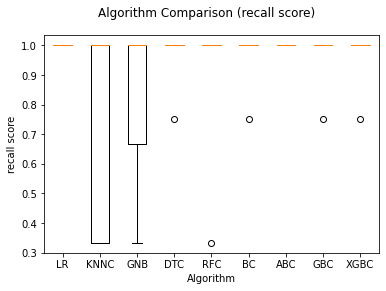

In [53]:
# algorithm comparison by recall score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (recall score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('recall score')
plt.show()

In [54]:
f1_results = []
names = []
scoring = 'f1'
for name, model in models:  
    pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                                  ['scaler', StandardScaler()],
                                  ['model', model]])
    #kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    cv_result = cross_val_score(pipeline, X, y, scoring=scoring, cv=5)
    f1_results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f)" %(scoring, name, cv_result.mean(), cv_result.std())
    print(msg)

f1 score of LR: 0.900000 (0.122474)
f1 score of KNNC: 0.671429 (0.239235)
f1 score of GNB: 0.860000 (0.195959)
f1 score of DTC: 0.771850 (0.388828)
f1 score of RFC: 0.860000 (0.195959)
f1 score of BC: 0.731850 (0.373276)
f1 score of ABC: 0.800422 (0.399157)
f1 score of GBC: 0.771850 (0.388828)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

f1 score of XGBC: 0.771850 (0.388828)


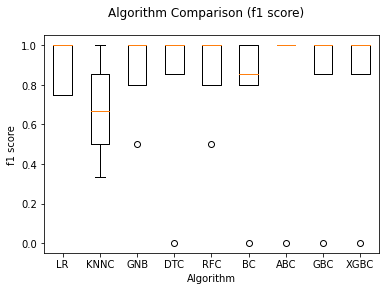

In [55]:
# algorithm comparison by f1 score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (f1 score)')
ax = fig.add_subplot(111)
plt.boxplot(f1_results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('f1 score')
plt.show()

In [56]:
accuracy_results = []
names = []
scoring = 'accuracy'
for name, model in models:  
    pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                                  ['scaler', StandardScaler()],
                                  ['model', model]])
    #kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    cv_result = cross_val_score(pipeline, X, y, scoring=scoring, cv=5)
    accuracy_results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f)" %(scoring, name, cv_result.mean(), cv_result.std())
    print(msg)

accuracy score of LR: 0.999867 (0.000162)
accuracy score of KNNC: 0.999668 (0.000235)
accuracy score of GNB: 0.999901 (0.000133)
accuracy score of DTC: 0.905738 (0.188358)
accuracy score of RFC: 0.999934 (0.000133)
accuracy score of BC: 0.905738 (0.188358)
accuracy score of ABC: 0.905804 (0.188391)
accuracy score of GBC: 0.905771 (0.188375)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

accuracy score of XGBC: 0.905771 (0.188375)


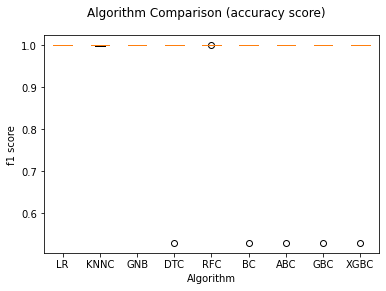

In [57]:
# algorithm comparison by accuracy score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (accuracy score)')
ax = fig.add_subplot(111)
plt.boxplot(accuracy_results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('f1 score')
plt.show()

#### Since AdaBoostClassifier have maximum f1 score, we choose that classifier,

### SMOTE balancing

In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X, y)

print(Counter(y))
print(Counter(y_sm))

Counter({0: 30136, 1: 16})
Counter({0: 30136, 1: 30136})


In [60]:
sc = StandardScaler()
X_sm_sc = sc.fit_transform(X_sm)

In [77]:
ssl_model_abc = AdaBoostClassifier()

In [78]:
ssl_model_abc.fit(X_sm_sc, y_sm)

AdaBoostClassifier()

In [54]:
data_weather_hold_1961.shape

(122, 16)

In [79]:
data_weather_hold_1961.drop(['Label'], axis=1, inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
data_weather_hold_2005.shape

(122, 16)

In [81]:
data_weather_hold_2005.drop(['Label'], axis=1, inplace=True)

In [82]:
X_1961_sc = sc.transform(data_weather_hold_1961)
X_2005_sc = sc.transform(data_weather_hold_2005)

In [84]:
ssl_pred_1961 = ssl_model_abc.predict(X_1961_sc)

In [85]:
ssl_pred_2005= ssl_model_abc.predict(X_2005_sc)

### Combine SSL prediction output to hold-out data as 'Label' feature

In [86]:
data_weather_hold_1961['Label'] = ssl_pred_1961

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [87]:
data_weather_hold_2005['Label'] = ssl_pred_2005

In [66]:
data_weather_hold_2005

,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes,Label
23893,29.4,25.0,9.8,9.8,0.0,17,11.5,33.1,1,6,2005,6,2,18,42,0
23894,28.8,24.8,14.8,14.8,0.0,20,10.3,32.0,2,6,2005,6,2,18,43,0
23895,30.4,24.9,6.6,6.6,0.0,11,13.9,40.7,3,6,2005,6,2,18,43,0
23896,29.9,25.4,21.6,21.6,0.0,18,12.6,35.6,4,6,2005,6,2,18,43,0
23897,28.6,24.9,20.3,20.3,0.0,19,7.3,25.2,5,6,2005,6,2,18,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,28.3,23.8,1.4,1.4,0.0,5,12.4,31.7,26,9,2005,6,12,18,19,0
24011,28.5,24.1,0.7,0.7,0.0,2,12.9,32.4,27,9,2005,6,12,18,18,0
24012,28.5,24.2,2.2,2.2,0.0,11,11.5,30.6,28,9,2005,6,12,18,18,0
24013,28.3,24.2,1.2,1.2,0.0,6,12.3,34.2,29,9,2005,6,12,18,17,0


In [88]:
df_weather = pd.concat([data_man_ssl, data_weather_hold_1961, data_weather_hold_2005], axis=0)

In [89]:
df_weather.shape

(30396, 16)

In [75]:
df_weather

,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,Day,Month,Year,sunrise_hour,sunrise_minutes,sunset_hour,sunset_minutes
1,30.7,19.0,0.0,0.0,0.0,0,13.0,30.2,0,2,1,1940,6,39,18,17
2,30.8,20.5,0.0,0.0,0.0,0,13.0,30.6,0,3,1,1940,6,40,18,17
3,30.8,20.6,0.2,0.2,0.0,2,13.0,30.6,0,4,1,1940,6,40,18,18
4,30.5,19.7,0.0,0.0,0.0,0,11.9,27.0,0,5,1,1940,6,40,18,18
5,30.5,19.8,0.0,0.0,0.0,0,13.0,28.1,0,6,1,1940,6,41,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,28.3,23.8,1.4,1.4,0.0,5,12.4,31.7,0,26,9,2005,6,12,18,19
24011,28.5,24.1,0.7,0.7,0.0,2,12.9,32.4,0,27,9,2005,6,12,18,18
24012,28.5,24.2,2.2,2.2,0.0,11,11.5,30.6,0,28,9,2005,6,12,18,18
24013,28.3,24.2,1.2,1.2,0.0,6,12.3,34.2,0,29,9,2005,6,12,18,17


In [90]:
df_weather['Label'].value_counts()

0    30196
1      200
Name: Label, dtype: int64

## Modelling

In [100]:
df_weather['snowfall_sum (cm)'].max()

KeyError: 'snowfall_sum (cm)'

In [98]:
df_weather['snowfall_sum (cm)'].min()

0.0

In [99]:
df_weather.drop(['snowfall_sum (cm)'], axis=1, inplace=True)

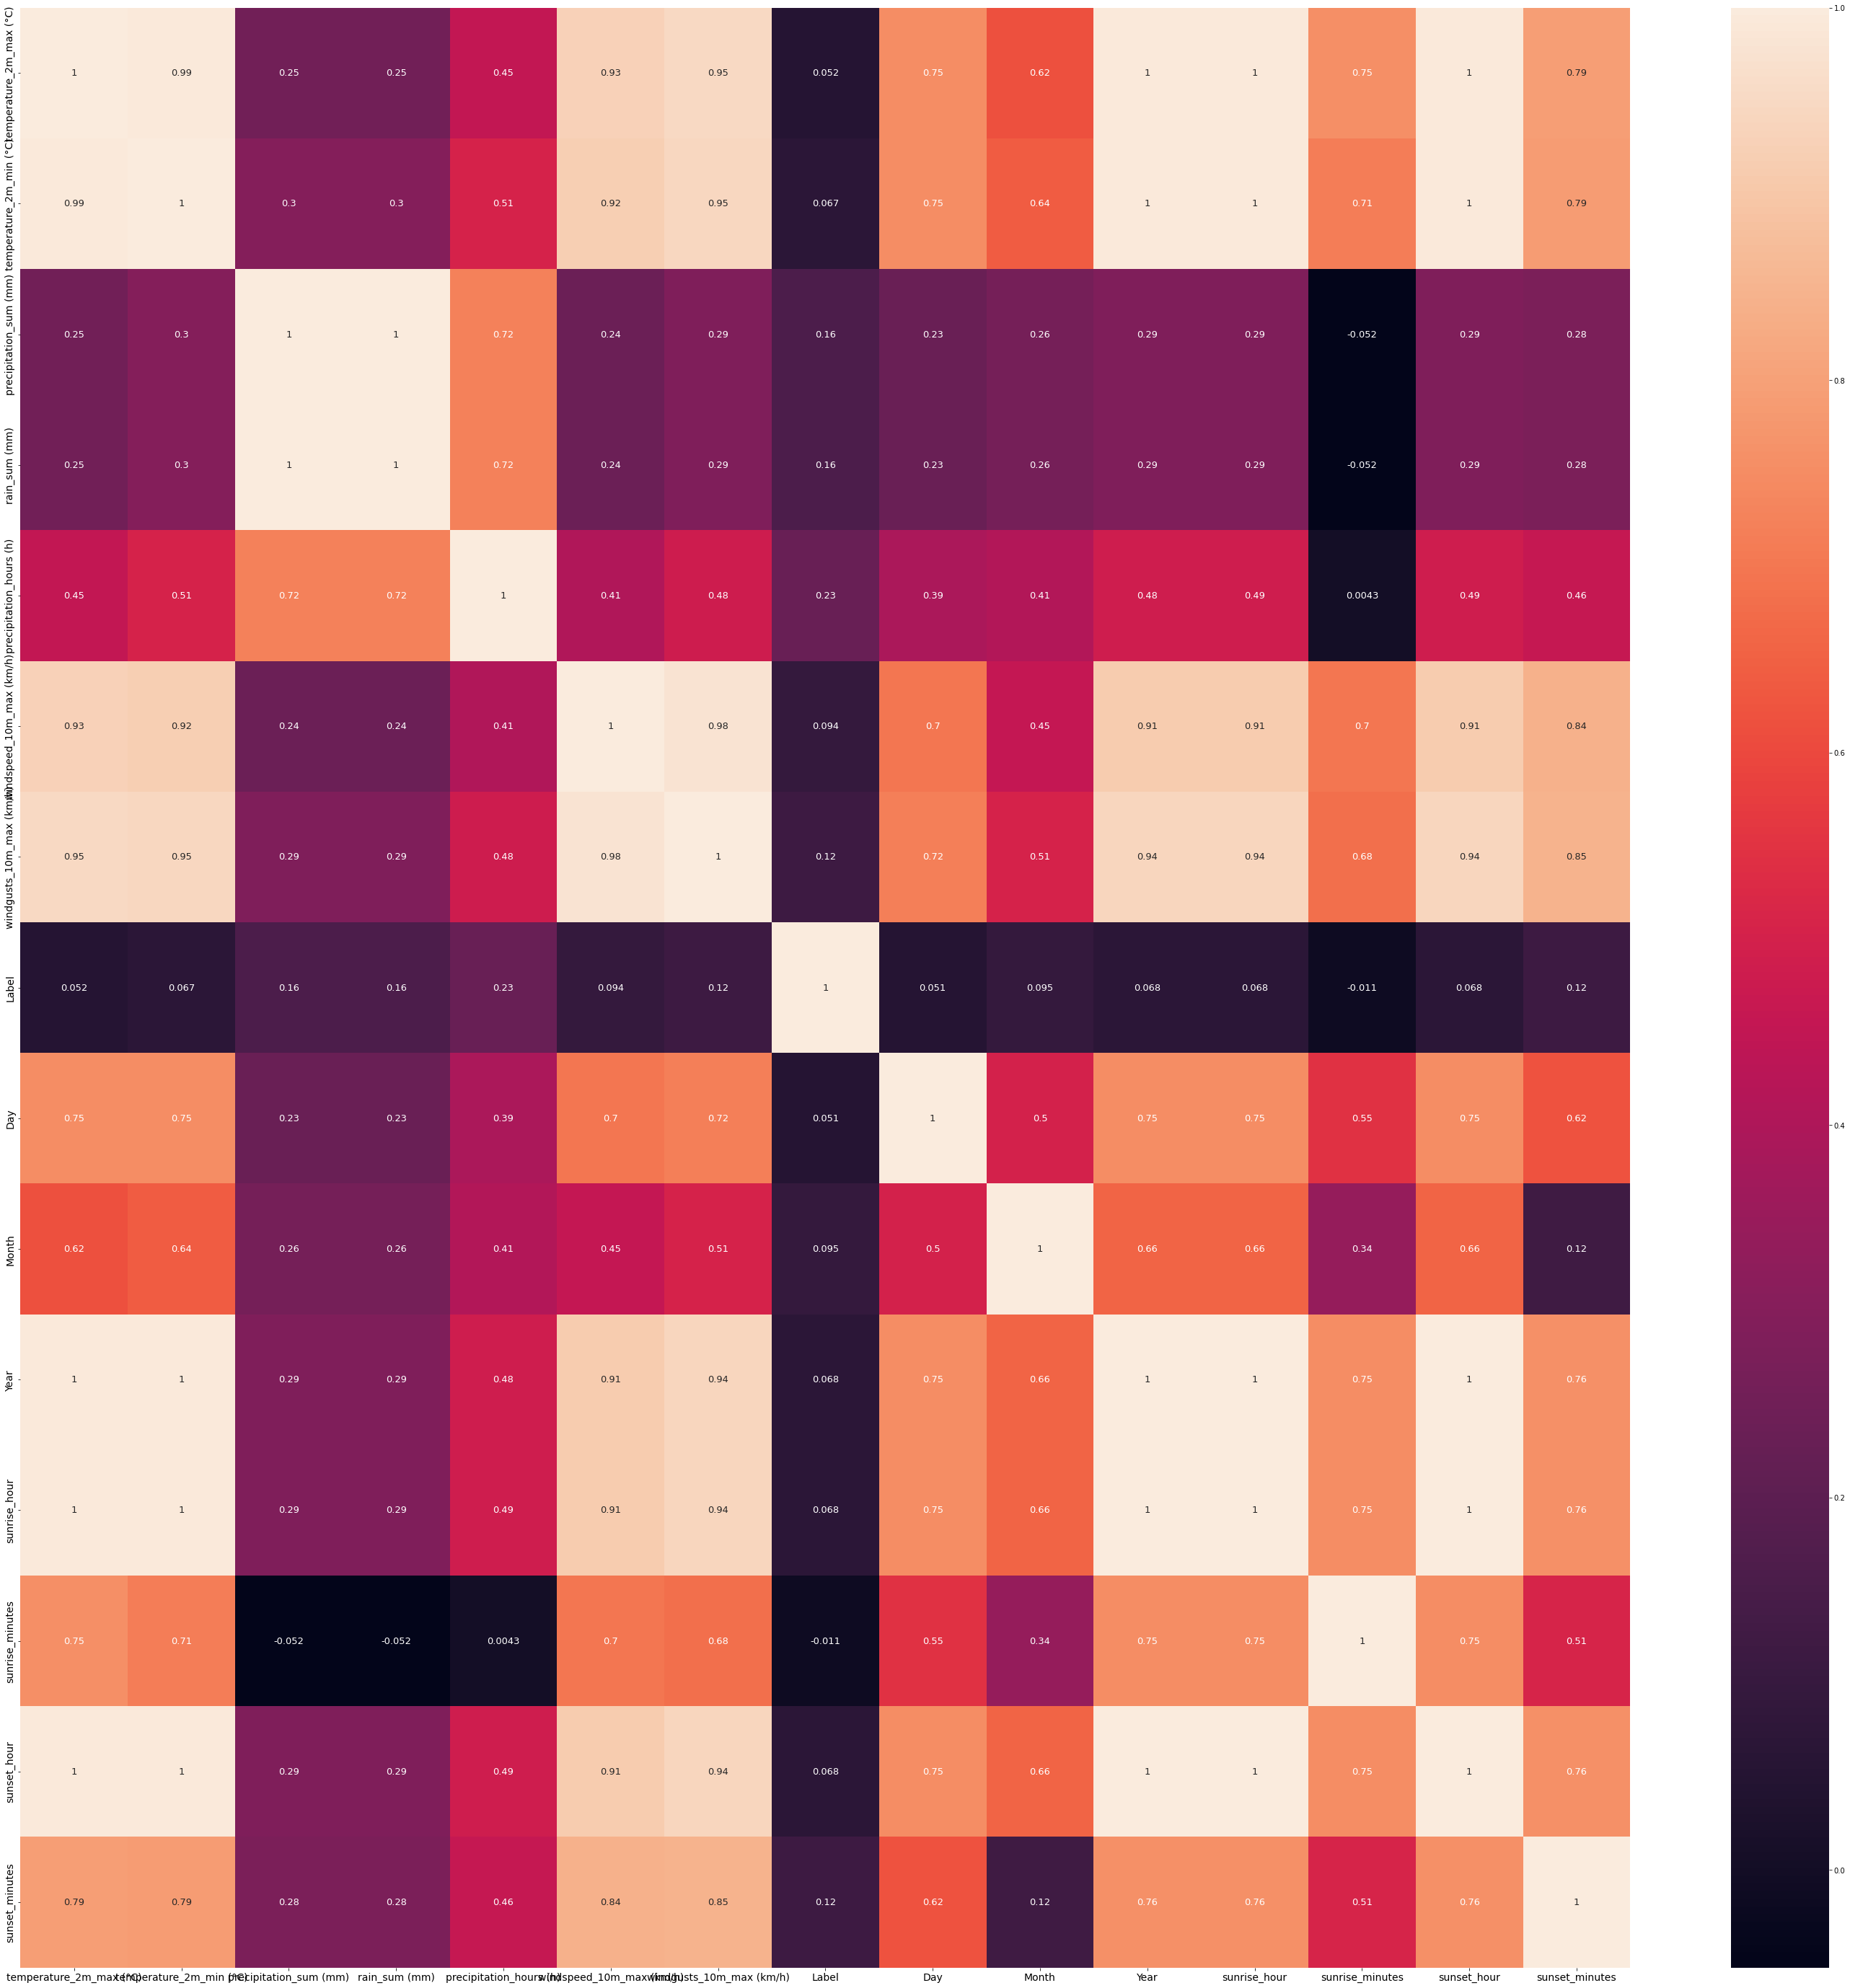

In [101]:
plt.figure(figsize=(50, 50))
sb.heatmap(df_weather.corr(), annot=True, annot_kws={'size':13})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [102]:
X_comb = df_weather.drop(['Label'], axis=1)
y_comb = df_weather['Label']

In [103]:
## feature importance

from sklearn.ensemble import ExtraTreesClassifier
feat_impModel = ExtraTreesClassifier()
feat_impModel.fit(X_comb, y_comb)

ExtraTreesClassifier()

In [104]:
print(feat_impModel.feature_importances_)

[3.84766311e-02 3.18062206e-02 1.04950471e-02 1.04769466e-02
 6.71884161e-02 2.32719679e-02 3.75638341e-02 2.17123785e-02
 3.64650913e-01 2.88742414e-02 1.46689002e-04 1.41491087e-01
 3.09636122e-04 2.23535992e-01]


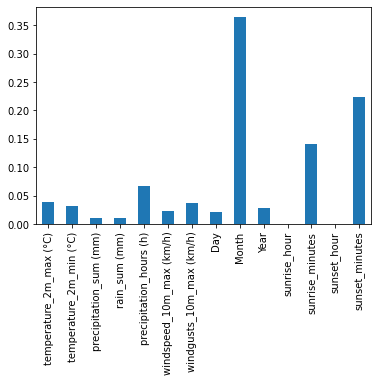

In [106]:
feat_imp_srs = pd.Series(feat_impModel.feature_importances_, index=X_comb.columns)
feat_imp_srs.plot(kind='bar')
plt.show()

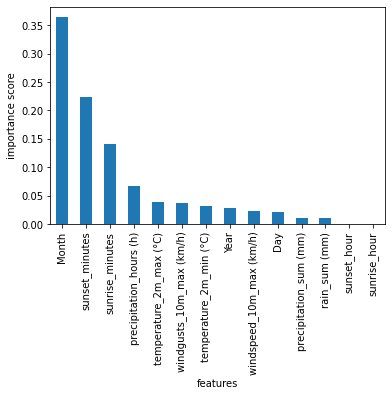

In [109]:
feat_imp_srs.nlargest(14).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance score')
plt.show()

In [119]:
X_comb.columns

Index(['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)', 'Day', 'Month',
       'Year', 'sunrise_hour', 'sunrise_minutes', 'sunset_hour',
       'sunset_minutes'],
      dtype='object')

In [149]:
df_weather.corr()

,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),Label,Day,Month,Year,sunrise_minutes,sunset_minutes
temperature_2m_max (°C),1.000000,0.994112,0.253957,0.452209,0.929717,0.950530,0.052195,0.749260,0.615122,0.995382,0.753356,0.791409
temperature_2m_min (°C),0.994112,1.000000,0.297827,0.505438,0.918108,0.946526,0.066828,0.751434,0.639464,0.995666,0.714028,0.786810
precipitation_sum (mm),0.253957,0.297827,1.000000,0.723810,0.238256,0.288118,0.159800,0.233512,0.261587,0.286026,-0.052457,0.278058
precipitation_hours (h),0.452209,0.505438,0.723810,1.000000,0.407671,0.478178,0.227906,0.392397,0.411143,0.484563,0.004290,0.458503
windspeed_10m_max (km/h),0.929717,0.918108,0.238256,0.407671,1.000000,0.975599,0.093543,0.699807,0.453313,0.912634,0.696278,0.842071
windgusts_10m_max (km/h),0.950530,0.946526,0.288118,0.478178,0.975599,1.000000,0.116340,0.717832,0.506652,0.938454,0.680252,0.845446
Label,0.052195,0.066828,0.159800,0.227906,0.093543,0.116340,1.000000,0.051413,0.094634,0.068101,-0.011460,0.118796
Day,0.749260,0.751434,0.233512,0.392397,0.699807,0.717832,0.051413,1.000000,0.499196,0.752499,0.547518,0.619673
Month,0.615122,0.639464,0.261587,0.411143,0.453313,0.506652,0.094634,0.499196,1.000000,0.656562,0.341894,0.121300
Year,0.995382,0.995666,0.286026,0.484563,0.912634,0.938454,0.068101,0.752499,0.656562,1.000000,0.749803,0.759365


In [150]:
df_weather.drop(['temperature_2m_max (°C)', 'Year', 'windspeed_10m_max (km/h)'], axis=1, inplace=True)

#### Droped 'temperature_2m_max (°C)', 'Year', 'windspeed_10m_max (km/h)', 'rain_sum (mm)', 'sunrise_hour', 'sunset_hour'

In [151]:
df_weather

,temperature_2m_min (°C),precipitation_sum (mm),precipitation_hours (h),windgusts_10m_max (km/h),Label,Day,Month,sunrise_minutes,sunset_minutes
1,19.0,0.0,0,30.2,0,2,1,39,17
2,20.5,0.0,0,30.6,0,3,1,40,17
3,20.6,0.2,2,30.6,0,4,1,40,18
4,19.7,0.0,0,27.0,0,5,1,40,18
5,19.8,0.0,0,28.1,0,6,1,41,19
...,...,...,...,...,...,...,...,...,...
24010,23.8,1.4,5,31.7,1,26,9,12,19
24011,24.1,0.7,2,32.4,1,27,9,12,18
24012,24.2,2.2,11,30.6,1,28,9,12,18
24013,24.2,1.2,6,34.2,1,29,9,12,17


In [152]:
X_comb = df_weather.drop(['Label'], axis=1)
y_comb = df_weather['Label']

In [153]:
# preparing models
models = []

models.append(('LR',LogisticRegression(random_state=42, max_iter=1000)))
models.append(('KNNC',KNeighborsClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('BC',BaggingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('XGBC',XGBClassifier(eval_metric='mlogloss')))

In [154]:
recall_results = []
names = []
scoring = 'recall'
for name, model in models:  
    pipeline = Pipeline(steps=[['scaler', StandardScaler()],
                               ['model', model]])
    #kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    cv_result = cross_val_score(pipeline, X_comb, y_comb, scoring=scoring, cv=5)
    recall_results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f)" %(scoring, name, cv_result.mean(), cv_result.std())
    print(msg)

recall score of LR: 0.660000 (0.294364)
recall score of KNNC: 0.620000 (0.069642)
recall score of GNB: 0.915000 (0.135647)
recall score of DTC: 0.885000 (0.230000)
recall score of RFC: 1.000000 (0.000000)
recall score of BC: 0.885000 (0.230000)
recall score of ABC: 1.000000 (0.000000)
recall score of GBC: 1.000000 (0.000000)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

recall score of XGBC: 0.980000 (0.040000)


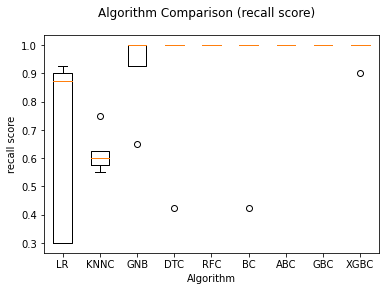

In [155]:
# algorithm comparison by f1 score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (recall score)')
ax = fig.add_subplot(111)
plt.boxplot(recall_results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('recall score')
plt.show()

In [129]:
f1_results = []
names = []
scoring = 'f1'
for name, model in models:  
    pipeline = Pipeline(steps=[['scaler', StandardScaler()],
                               ['model', model]])
    #kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    cv_result = cross_val_score(pipeline, X_comb, y_comb, scoring=scoring, cv=5)
    f1_results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f)" %(scoring, name, cv_result.mean(), cv_result.std())
    print(msg)

f1 score of LR: 0.712122 (0.288074)
f1 score of KNNC: 0.733156 (0.025968)
f1 score of GNB: 0.513379 (0.161187)
f1 score of DTC: 0.802363 (0.395274)
f1 score of RFC: 0.884768 (0.230464)
f1 score of BC: 0.802215 (0.395570)
f1 score of ABC: 1.000000 (0.000000)
f1 score of GBC: 0.800000 (0.400000)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

f1 score of XGBC: 0.861538 (0.276923)


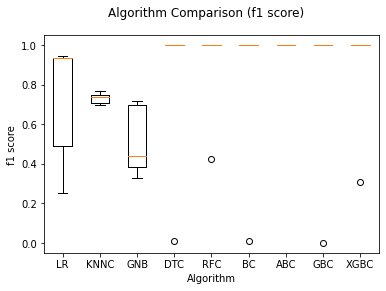

In [130]:
# algorithm comparison by f1 score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (f1 score)')
ax = fig.add_subplot(111)
plt.boxplot(f1_results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('f1 score')
plt.show()

In [131]:
acc_results = []
names = []
scoring = 'accuracy'
for name, model in models:  
    pipeline = Pipeline(steps=[['scaler', StandardScaler()],
                               ['model', model]])
    #kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    cv_result = cross_val_score(pipeline, X_comb, y_comb, scoring=scoring, cv=5)
    acc_results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f)" %(scoring, name, cv_result.mean(), cv_result.std())
    print(msg)

accuracy score of LR: 0.996315 (0.004243)
accuracy score of KNNC: 0.997204 (0.000233)
accuracy score of GNB: 0.985129 (0.008408)
accuracy score of DTC: 0.917618 (0.164764)
accuracy score of RFC: 0.997796 (0.004088)
accuracy score of BC: 0.917750 (0.164501)
accuracy score of ABC: 1.000000 (0.000000)
accuracy score of GBC: 0.919131 (0.161737)


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

accuracy score of XGBC: 0.997335 (0.005330)


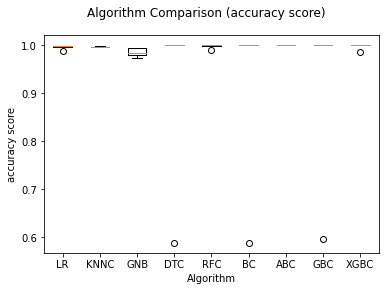

In [132]:
# algorithm comparison by f1 score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (accuracy score)')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('accuracy score')
plt.show()

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_comb, y_comb, test_size=0.20, random_state=1, stratify=y_comb)

In [93]:
#sm_comb = SMOTE()
#X_train_sm, y_train_sm = sm_comb.fit_resample(X_train, y_train)

#print(Counter(y_train))
#print(Counter(y_train_sm))

In [94]:
#X_train_sm

In [134]:
len(y_train[y_train==1])/len(y_train)

0.006580029610133245

In [135]:
len(y_test[y_test==1])/len(y_test)

0.006578947368421052

In [136]:
len(y_test[y_test==1])

40

In [157]:
sc_comb = StandardScaler()
X_train_sc = sc_comb.fit_transform(X_train)

In [158]:
sc_file = 's_scaler.pkl'
with open(sc_file, 'wb') as file:
    pickle.dump(sc_comb, file)

In [159]:
model_comb_xgb = XGBClassifier(eval_metric='mlogloss')
model_comb_xgb.fit(X_train_sc, y_train)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
model_comb_xgb.score(X_train_sc, y_train)

1.0

### Evaluation on test data

In [161]:
X_test_sc = sc_comb.transform(X_test)

In [162]:
y_pred = model_comb_xgb.predict(X_test_sc)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6040
           1       1.00      1.00      1.00        40

    accuracy                           1.00      6080
   macro avg       1.00      1.00      1.00      6080
weighted avg       1.00      1.00      1.00      6080



In [164]:
confusion_matrix(y_test, y_pred)

array([[6040,    0],
       [   0,   40]], dtype=int64)

In [103]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
len(y_test[y_test==0])

6070

In [165]:
X_test['Prediction'] = y_pred

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [166]:
X_test['Label'] = y_test

In [167]:
len(X_test.loc[X_test['Prediction']==0])

6040

In [168]:
X_test.loc[(X_test['Prediction']==0) | (X_test['Label']==1)]

,temperature_2m_min (°C),precipitation_sum (mm),precipitation_hours (h),windgusts_10m_max (km/h),Day,Month,sunrise_minutes,sunset_minutes,Prediction,Label
6120,0.0,0.0,0,0.0,0,0,0,0,0,0
24092,22.8,0.1,1,18.0,17,12,32,9,0,0
3048,23.6,26.4,18,27.7,6,5,5,37,0,0
11865,0.0,0.0,0,0.0,0,0,0,0,0,0
27438,24.1,0.7,2,26.6,14,2,43,34,0,0
...,...,...,...,...,...,...,...,...,...,...
13600,25.9,0.1,1,29.5,27,3,23,36,0,0
20854,24.0,0.0,0,23.8,4,2,45,32,0,0
12700,0.0,0.0,0,0.0,0,0,0,0,0,0
810,23.2,1.3,4,38.2,21,3,27,36,0,0


In [169]:
X_test.shape

(6080, 10)

In [170]:
dump_file = open('flood_model.pkl', "wb")
pickle.dump(model_comb_xgb, dump_file)
dump_file.close()